In [46]:
import pandas as pd

In [47]:
buffer=1000000
frames=[]
for month in ['01','02','03','04','05']:
    a=pd.read_csv("yellow_tripdata_2018-"+month+".csv", nrows=buffer,
                             usecols=['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance'])
    frames.append(a)
df = pd.concat(frames)

In [49]:
df.info(null_counts=True) #Checking the NaN values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4968456 entries, 0 to 999999
Data columns (total 3 columns):
tpep_pickup_datetime     4968456 non-null object
tpep_dropoff_datetime    4968456 non-null object
trip_distance            4968456 non-null float64
dtypes: float64(1), object(2)
memory usage: 151.6+ MB


In [50]:
df=df[df.trip_distance > 0.00] # eliminating those rows that are included in zero values of 'trip_distance'

In [51]:
from datetime import datetime
from datetime import timedelta
def getRowDuration(row):
    dateFormat='%Y-%m-%d %H:%M:%S'
    pickup = datetime.strptime(row['tpep_pickup_datetime'], dateFormat)
    dropoff = datetime.strptime(row['tpep_dropoff_datetime'], dateFormat)
    tdelta = (dropoff - pickup).seconds / 3600
    return tdelta

df['duration']=df.apply(getRowDuration, axis=1)

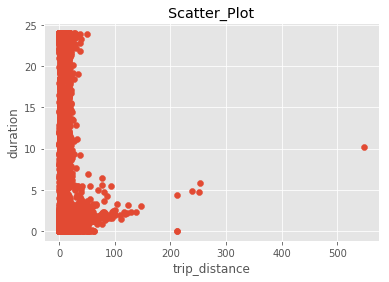

In [52]:
# Plotting the dependency between 'trip distance' & 'duration'
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.scatter(x= df['trip_distance'], y= df['duration'])
plt.xlabel("trip_distance")
plt.ylabel("duration")
plt.title("Scatter_Plot")
plt.show()

In [54]:
# Calculating the Pearson correlation coefficient
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['trip_distance'], df['duration'])
print ("The Pearson correlation coefficient is:" + str("%0.2f"%corr))

The Pearson correlation coefficient is:0.15


### Conclusions

#### According to Scatter Plot & Pearson Coefficient (R), we can conclude that there is no dependency between 'trip distance' & 'duration' and couple of reasons can be mentioned for this end:

#### 1. Traffic can be one reason which affects the duration while distance is constant
#### 2. Also, as can be seen, approximately, all the trips with long distances have low duration (highway), on the other hand, we can see that there is a lot of  trips with short distances but long durations (traffic). 
#### 3. Other situations can also be mentioned such as, Weather, Speed, and so on. 